In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import load_iris
# Load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['class'] = iris.target

iris_df.head()

# here 0 means setosa, 1 means versicolor, 2 means virginica

def map_class(x):
    if x == 0:
        return 'setosa'
    elif x == 1:
        return 'versicolor'
    elif x == 2:
        return 'virginica'

iris_df['class'] = iris_df['class'].apply(map_class)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris_df.rename(columns={'sepal length (cm)': 'sepal_length', 
                        'sepal width (cm)': 'sepal_width',
                          'petal length (cm)': 'petal_length',
                            'petal width (cm)': 'petal_width'}, 
                            inplace=True)

In [10]:
iris_df['class'].value_counts()

class
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

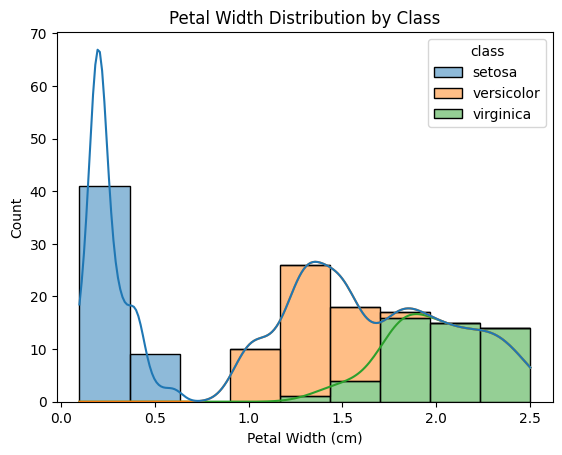

In [16]:
# 1 d analysis

# petal length distribution
sns.histplot(iris_df, x='petal_width', hue='class', multiple='stack', kde=True)
plt.title('Petal Width Distribution by Class')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Count')
plt.show()

# assignment : 
# 1. Do the same for petal length, petal width, sepal length, sepal width
# 2. Write the observations for each distribution



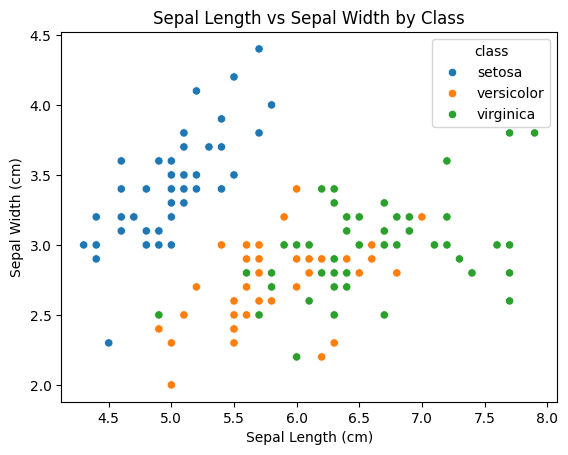

In [15]:
# 
sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width', hue='class')
plt.title('Sepal Length vs Sepal Width by Class')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


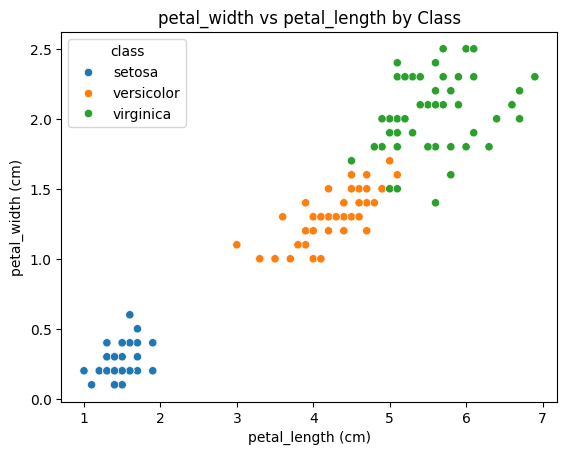

In [19]:
def plot_scatter(x, y):
    sns.scatterplot(data=iris_df, x=x, y=y, hue='class')
    plt.title(f'{y} vs {x} by Class')
    plt.xlabel(f'{x} (cm)')
    plt.ylabel(f'{y} (cm)')
    plt.show()


plot_scatter('petal_length', 'petal_width')

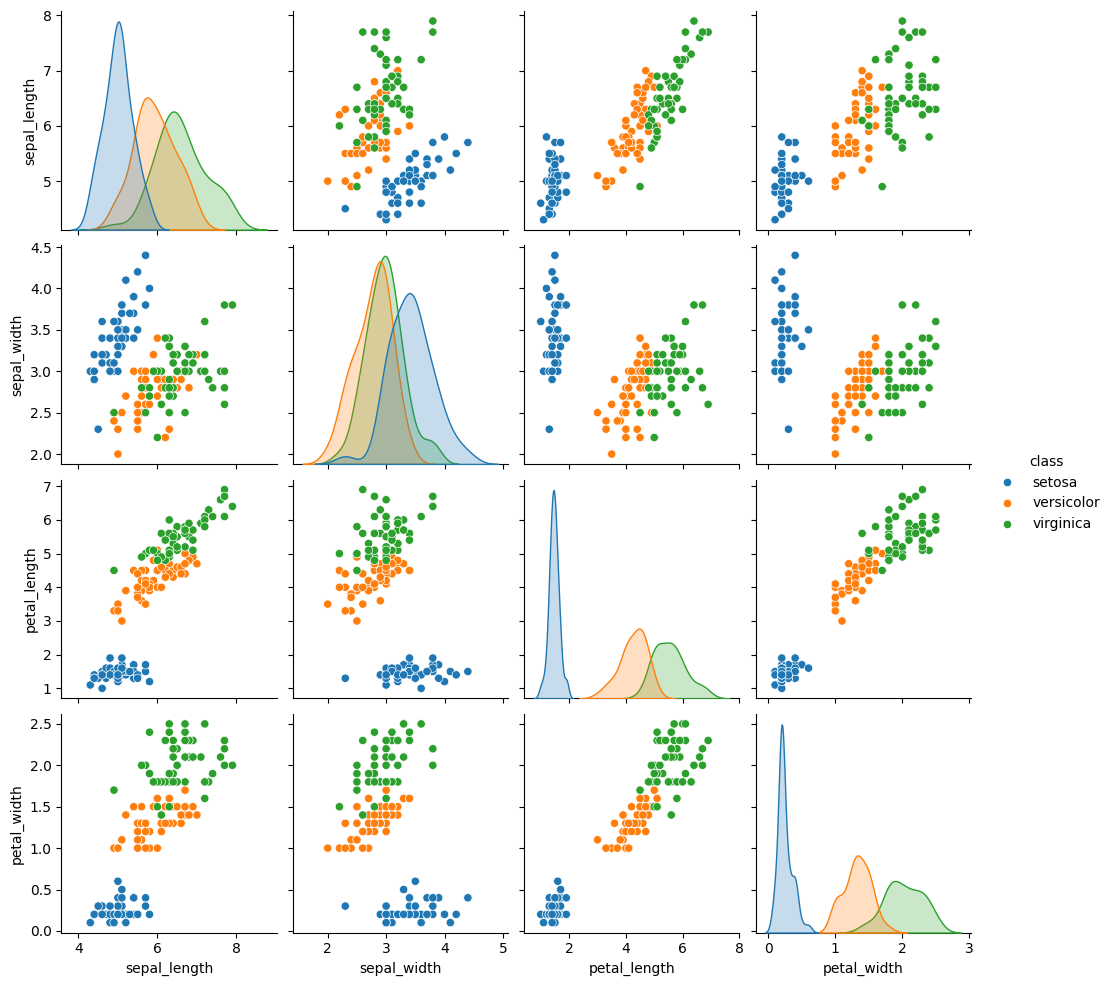

In [20]:
sns.pairplot(iris_df, hue='class')
plt.show()

In [21]:
import plotly.express as px

fig = px.scatter_3d(iris_df, x='sepal_length', y='sepal_width', z='petal_length', color='class', size='petal_width',title='3D Scatter plot of Iris Dataset'
                    )

fig.show()

In [23]:
# rule based engine backed by our analysis 
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    if petal_length < 2.5:
        return 'setosa'
    elif petal_width < 1.7:
        return 'versicolor'
    else:
        return 'virginica'
    

new_flower = {
    'sepal_length': 5.1,
    'sepal_width': 3.5,
    'petal_length': 1.4,
    'petal_width': 0.2
}

predicted_class = predict_species(**new_flower)
print(f'The predicted species for the new flower is: {predicted_class}')

The predicted species for the new flower is: setosa


In [ ]:
# histogram, boxplot, violin plot : this we use to analyze the distribution of features ( 1D analysis )